## Topic Modeling on DBPedia Dataset using NMF

In [1]:
# NMF = Non-negative Matrix Factorization:
# a linear-algebraic model which reduces vectors to low dimensionality
# it has an inherent clustering property when performing this reduction

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Dataset - large multi-domain ontology derived from Wikipedia, can be found at:
# https://www.kaggle.com/datasets/danofer/dbpedia-classes
# http://dbpedia-generic.tib.eu/release/text/
dbpedia_df = pd.read_csv('./datasets/dbpedia/DBPEDIA_train.csv')

dbpedia_df.shape

(240942, 4)

In [4]:
NUM_SAMPLES = 10000

dbpedia_df = dbpedia_df.sample(NUM_SAMPLES, random_state=1, replace=False).reset_index(drop=True)
dbpedia_df.sample(5)

,text,l1,l2,l3
7123,Dóra Ivanics (born 29 June 1994 in Balassagyar...,Agent,Athlete,HandballPlayer
139,North Island Challenge Stakes was a major thor...,Event,Race,HorseRace
8615,Caecidae is a taxonomic family of very small a...,Species,Animal,Mollusca
9573,Rashid Khan (born 15 February 1991) is an Indi...,Agent,Athlete,GolfPlayer
8073,The 2010 LSU Tigers football team represented ...,SportsSeason,SportsTeamSeason,NCAATeamSeason


In [5]:
X = dbpedia_df['text']
X.head()

0    Mutter's Ridge was the name given by U.S. Mari...
1    Ligia exotica, also called sea roach or wharf ...
2    The AFC Asian Cup 2004 Final was an associatio...
3    Pasta Zara – Cogeas (UCI team code: PZC) is a ...
4    The 1969 Madrid Grand Prix was a Formula One n...
Name: text, dtype: object

In [6]:
count_vectorizer = CountVectorizer(stop_words='english')
transformed_vector = count_vectorizer.fit_transform(X)
transformed_vector.shape

(10000, 65799)

In [7]:
feature_names = count_vectorizer.get_feature_names()
feature_names[7000:7005]

/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bandanna', 'bandar', 'bandara', 'banded', 'bander']

In [8]:
len(feature_names)

65799

In [9]:
NUM_TOPICS = 7

nmf_model = NMF(n_components=NUM_TOPICS)
nmf = nmf_model.fit_transform(transformed_vector) 

nmf.shape 

(10000, 7)

In [10]:
nmf[:2]

array([[0.0011986 , 0.10498492, 0.00322389, 0.01680343, 0.00087053,
        0.01673515, 0.00062292],
       [0.        , 0.02120987, 0.        , 0.        , 0.02308929,
        0.04107695, 0.        ]])

In [11]:
nmf_model.components_.shape

(7, 65799)

In [12]:
def get_topic(identifier, top_words=10):
    for topic_id, topic_word_probs in enumerate(nmf_model.components_):
        if topic_id==identifier:
            #print('Topic %d:' % (topic_id))
            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words -1 : -1]]
            return(' '.join(top_feature_names))    

In [13]:
for i in range(7):
    print('Topic %d:' % (i))
    print(get_topic(i, top_words=4))  

Topic 0:
season league football team
Topic 1:
lake river new south
Topic 2:
album released number single
Topic 3:
party election political elected
Topic 4:
school university high college
Topic 5:
won world team born
Topic 6:
bridge river truss built


In [14]:
topic_id_topic_mapping = {}

for i in range(7):
    topic_id_topic_mapping[i]=get_topic(i, top_words=3)

topic_id_topic_mapping

{0: 'season league football',
 1: 'lake river new',
 2: 'album released number',
 3: 'party election political',
 4: 'school university high',
 5: 'won world team',
 6: 'bridge river truss'}

In [15]:
topic_to_doc_mapping = {}
topic_list = []
topic_names = []

for i in range(NUM_SAMPLES):
    most_likely_topic=nmf[i].argmax()
    
    if most_likely_topic not in topic_to_doc_mapping:
        topic_to_doc_mapping[most_likely_topic]=[]
        
    topic_to_doc_mapping[most_likely_topic].append(i)
    
    topic_list.append(most_likely_topic)
    topic_names.append(topic_id_topic_mapping[most_likely_topic])
    
dbpedia_df['Most_Likely_Topic']= topic_list
dbpedia_df['Most_Likely_Topic_Names']= topic_names

dbpedia_df.sample(10)

,text,l1,l2,l3,Most_Likely_Topic,Most_Likely_Topic_Names
4845,Hypnotheca is a fungal genus in the division A...,Species,Eukaryote,Fungus,1,lake river new
1178,Heiko Butscher (born 28 July 1980) is a retire...,Agent,SportsManager,SoccerManager,5,won world team
2170,Al-Karimah (Arabic: الكريمة‎‎; also spelled Ka...,Place,Settlement,Town,1,lake river new
7904,"John Noel Dempsey (January 3, 1915 – July 16, ...",Agent,Politician,Senator,5,won world team
1545,The Roman Catholic Diocese of Plymouth is a La...,Place,ClericalAdministrativeRegion,Diocese,1,lake river new
9077,HC ZUBR Přerov is an ice hockey team currently...,Agent,SportsTeam,HockeyTeam,0,season league football
123,"1791 Patsayev, provisional designation 1967 RE...",Place,CelestialBody,Planet,1,lake river new
8237,The 2009 Trophée des Champions Final was a foo...,Event,SportsEvent,FootballMatch,5,won world team
5593,The Roman Catholic Diocese of Raiganj (Latin: ...,Place,ClericalAdministrativeRegion,Diocese,1,lake river new
837,Walden Galleria is an enclosed shopping mall l...,Place,Building,ShoppingMall,1,lake river new


## Interactive Topic Visualization using Bokeh

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', random_state=0)

nmf_2d_tsne = tsne.fit_transform(nmf)
nmf.shape, nmf_2d_tsne.shape

/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


((10000, 7), (10000, 2))

In [17]:
nmf_2d_tsne = pd.DataFrame(nmf_2d_tsne)

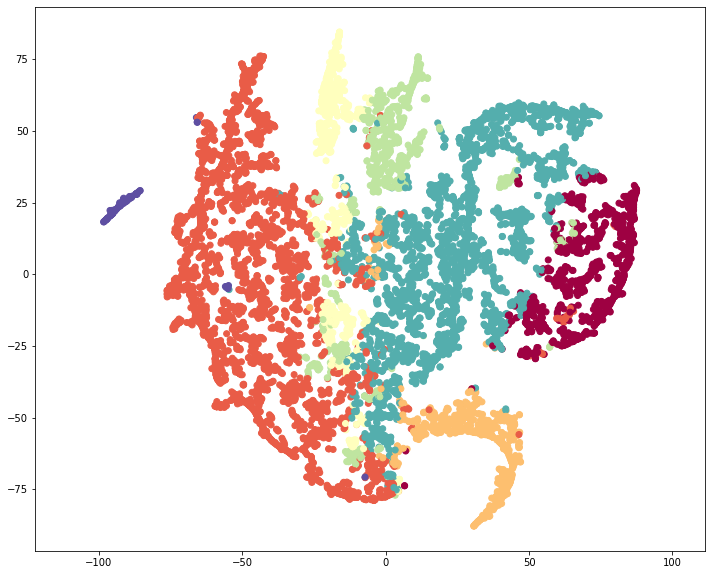

In [18]:
plt.subplots(figsize=(12, 10))
plt.axis('equal')

plt.scatter(nmf_2d_tsne[0], nmf_2d_tsne[1], c=dbpedia_df['Most_Likely_Topic'], cmap=plt.cm.Spectral)

In [19]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet

output_notebook()

Loading BokehJS ...

In [20]:
nmf_2d_tsne

,0,1
0,-63.225422,7.530069
1,0.976999,-31.634357
2,53.910194,34.296185
3,35.865932,7.567174
4,15.671814,21.326931
...,...,...
9995,-2.030196,-42.743759
9996,-42.204311,-32.026138
9997,60.564419,0.434019
9998,-32.020470,-4.963596


In [21]:
df = pd.DataFrame(nmf_2d_tsne)
df.columns = ['x', 'y']
df.head()

,x,y
0,-63.225422,7.530069
1,0.976999,-31.634357
2,53.910194,34.296185
3,35.865932,7.567174
4,15.671814,21.326931


In [22]:
df['topic'] = dbpedia_df['Most_Likely_Topic_Names']
df.head()

,x,y,topic
0,-63.225422,7.530069,lake river new
1,0.976999,-31.634357,won world team
2,53.910194,34.296185,won world team
3,35.865932,7.567174,won world team
4,15.671814,21.326931,won world team


In [23]:
source = ColumnDataSource(ColumnDataSource.from_df(df))

labels = LabelSet(x='x', y='y', text='topic', y_offset=8,
                 text_font_size='8pt', text_color='#555555',
                 source=source, text_align='center')

plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)

show(plot, notebook_handle=True)